In [1]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./data/iris-data.csv")
data

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepal-length   150 non-null    float64
 1    sepal-width   150 non-null    float64
 2    petal-length  150 non-null    float64
 3    petal-width   150 non-null    float64
 4    species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.duplicated().sum()

3

In [6]:
data['sepal-length'].unique() 

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [7]:
data.columns

Index(['sepal-length', ' sepal-width', ' petal-length', ' petal-width',
       ' species'],
      dtype='object')

In [14]:
data[' species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data[' species']= label_encoder.fit_transform(data[' species'])
  
data[' species'].unique()

array([0, 1, 2])

In [9]:
data.describe()

,sepal-length,sepal-width,petal-length,petal-width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
data.duplicated().sum()

3

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.duplicated().sum()

0

In [13]:
data.columns

Index(['sepal-length', ' sepal-width', ' petal-length', ' petal-width',
       ' species'],
      dtype='object')

In [ ]:
#data.drop(['species'],axis=1,inplace=True)

In [14]:
data.columns

Index(['sepal-length', ' sepal-width', ' petal-length', ' petal-width',
       ' species'],
      dtype='object')

In [15]:
data.describe()

,sepal-length,sepal-width,petal-length,petal-width,species
count,147.000000,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844,1.006803
std,0.829100,0.437009,1.759111,0.757874,0.815069
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [16]:
data.corr()

,sepal-length,sepal-width,petal-length,petal-width,species
sepal-length,1.000000,-0.109321,0.871305,0.817058,0.782904
sepal-width,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
petal-length,0.871305,-0.421057,1.000000,0.961883,0.948339
petal-width,0.817058,-0.356376,0.961883,1.000000,0.955693
species,0.782904,-0.418348,0.948339,0.955693,1.000000


<Axes: >

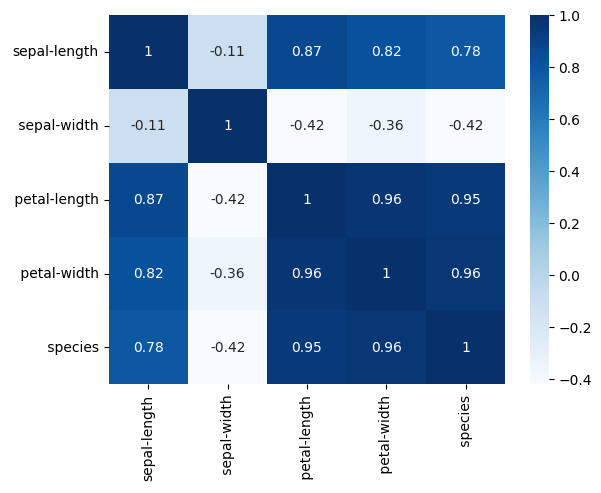

In [17]:
sns.heatmap(data.corr(),annot=True, cmap="Blues")

In [18]:
X = data.drop(' species',axis=1)
y=data[' species']
print(X)

     sepal-length   sepal-width   petal-length   petal-width
0             5.1           3.5            1.4           0.2
1             4.9           3.0            1.4           0.2
2             4.7           3.2            1.3           0.2
3             4.6           3.1            1.5           0.2
4             5.0           3.6            1.4           0.2
..            ...           ...            ...           ...
145           6.7           3.0            5.2           2.3
146           6.3           2.5            5.0           1.9
147           6.5           3.0            5.2           2.0
148           6.2           3.4            5.4           2.3
149           5.9           3.0            5.1           1.8

[147 rows x 4 columns]


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(
    X, y, train_size = 0.20, random_state=33
)

In [20]:
y_train.shape, X_train.shape, X_test.shape, y_test.shape

((29,), (29, 4), (118, 4), (118,))

In [22]:
classify_model = LogisticRegression(max_iter=1000) 
classify_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [23]:
preds = classify_model.predict(X_test)
preds

array([2, 0, 1, 0, 2, 2, 2, 1, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 2, 1,
       2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 0, 1, 1, 1, 0, 0, 1, 0,
       2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 0, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2,
       2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 2, 2, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 1, 0, 1, 2, 1,
       0, 0, 0, 2, 2, 0, 2, 1])

In [25]:
comp = pd.DataFrame({'y_test':y_test, 'y_preds': preds})
comp

,y_test,y_preds
141,2,2
17,0,0
97,1,1
27,0,0
144,2,2
...,...,...
116,2,2
109,2,2
3,0,0
83,1,2


[[38  0  0]
 [ 0 37  3]
 [ 0  1 39]]


<Axes: >

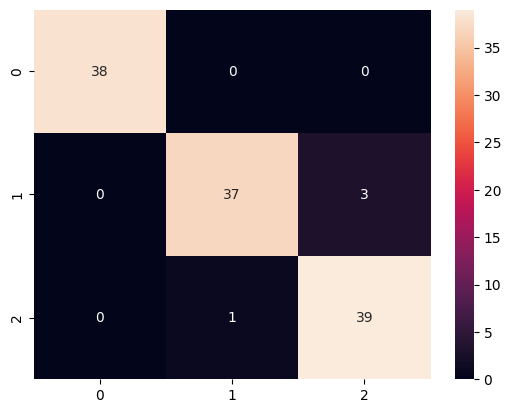

In [26]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, preds)
print(conf_matrix)

#seaborn for graphical display
import seaborn as sns
sns.heatmap(conf_matrix, annot=True)


In [27]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

0.9661016949152542
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.97      0.93      0.95        40
           2       0.93      0.97      0.95        40

    accuracy                           0.97       118
   macro avg       0.97      0.97      0.97       118
weighted avg       0.97      0.97      0.97       118



# decision tree classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
decisionTree = DecisionTreeClassifier()

In [30]:
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
decision_y_pred = decisionTree.predict(X_test)

In [32]:
com = pd.DataFrame({'decision_y_test':y_test,'decision_y_pred':decision_y_pred})
com

,decision_y_test,decision_y_pred
141,2,2
17,0,0
97,1,1
27,0,0
144,2,2
...,...,...
116,2,2
109,2,2
3,0,0
83,1,1


In [33]:
len_test = len(decision_y_pred)
len_test
default_arr = np.array(range(len_test))
default_arr

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117])

In [34]:
decisionTree.score(X_test,y_test)

0.9491525423728814

[[38  0  0]
 [ 0 38  2]
 [ 0  4 36]]


<Axes: >

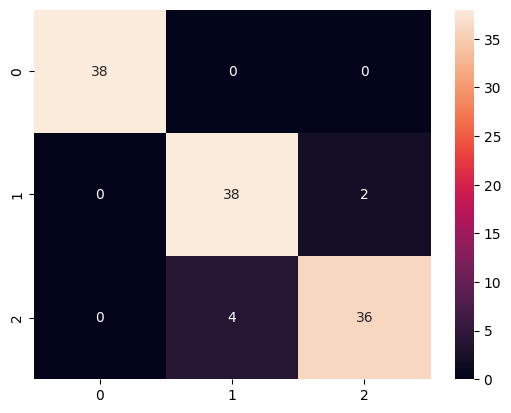

In [35]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, decision_y_pred)
print(conf_matrix)

#seaborn for graphical display
import seaborn as sns
sns.heatmap(conf_matrix, annot=True)